## 1- import libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2- load data

In [2]:
car = pd.read_csv(r"D:\ITI_Data_analysis\machine_learning\Automobile_regression\Automobile_data.csv", na_values="?")
car

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


## 3- Data exploration

In [3]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [4]:
car.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [5]:
car.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [6]:
car.columns[car.dtypes == "object"]

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')

In [7]:
## if full line duplicated
car.duplicated().sum()

0

In [8]:
## statistical analysis
car.describe() 

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## 4- Data cleansing

In [9]:
car.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

### fill null values

In [10]:
# if we have outliers
car["normalized-losses"].median()

115.0

In [11]:
# if data normal distribution
car["normalized-losses"].mean()

122.0

In [12]:
car =car.fillna(car.median())

C:\Users\hp\AppData\Local\Temp\ipykernel_29644\3846305682.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  car =car.fillna(car.median())


In [13]:
car.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [14]:
car["num-of-doors"].unique()

array(['two', 'four', nan], dtype=object)

In [15]:
car["num-of-doors"].mode()

0    four
Name: num-of-doors, dtype: object

In [16]:
car["num-of-doors"] =car["num-of-doors"].fillna(car["num-of-doors"].mode()[0])

In [17]:
car.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [18]:
car["num-of-doors"].unique()

array(['two', 'four'], dtype=object)

In [19]:
car["num-of-doors"] = car["num-of-doors"].replace({'two': 2, 'four':4})

In [20]:
car["num-of-cylinders"].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [21]:
car["num-of-cylinders"] = car["num-of-cylinders"].replace({'four':4,'six':6,'five':5,'three':3,
                                                            'twelve':12,'two':2,'eight':8})


In [22]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    int64  
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    int64  
 16  engine-size        205 non

In [23]:
car.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,115.0,audi,gas,std,2,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,4,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,115.0,audi,gas,std,4,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,4,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,0,115.0,audi,gas,turbo,2,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,10295.0


## 5- EDA 
### Graphical analysis

In [24]:
car["price"].describe()

count      205.000000
mean     13150.307317
std       7879.121326
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

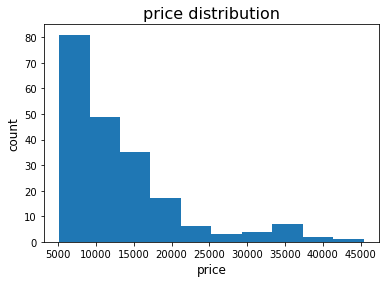

In [25]:
# price distribution
plt.figure()
plt.hist(car["price"])
plt.title("price distribution", size =16)
plt.xlabel("price",size = 12)
plt.ylabel("count",size = 12)
plt.show()

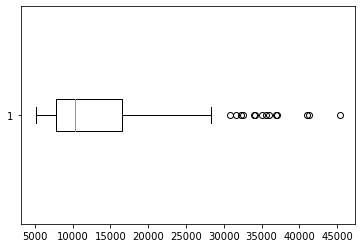

In [26]:
# price distribution
plt.figure()
plt.boxplot(car["price"] , vert= False , showfliers=True)
plt.show()

In [27]:
car["price"].quantile([0.75])

0.75    16500.0
Name: price, dtype: float64

In [28]:
car[car["price"] > 30000]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
15,0,115.0,bmw,gas,std,4,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,30760.0
16,0,115.0,bmw,gas,std,2,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,41315.0
17,0,115.0,bmw,gas,std,4,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,36880.0
47,0,145.0,jaguar,gas,std,4,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176.0,4750.0,15,19,32250.0
48,0,115.0,jaguar,gas,std,4,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176.0,4750.0,15,19,35550.0
49,0,115.0,jaguar,gas,std,2,sedan,rwd,front,102.0,...,326,mpfi,3.54,2.76,11.5,262.0,5000.0,13,17,36000.0
70,-1,93.0,mercedes-benz,diesel,turbo,4,sedan,rwd,front,115.6,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,31600.0
71,-1,115.0,mercedes-benz,gas,std,4,sedan,rwd,front,115.6,...,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,34184.0
72,3,142.0,mercedes-benz,gas,std,2,convertible,rwd,front,96.6,...,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,35056.0
73,0,115.0,mercedes-benz,gas,std,4,sedan,rwd,front,120.9,...,308,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,40960.0


In [29]:
# fetures distribution
def my_plot (feature):
    plt.figure()
    plt.hist(car[feature])
    plt.title("{} distribution".format(feature), size =16)
    plt.xlabel(feature,size = 12)
    plt.ylabel("count",size = 12)
    plt.show()

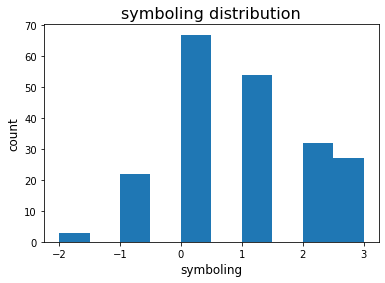

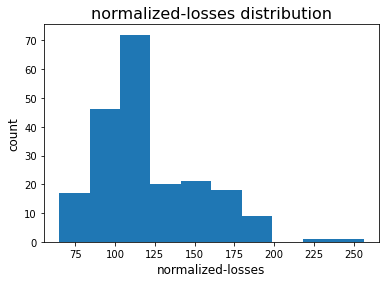

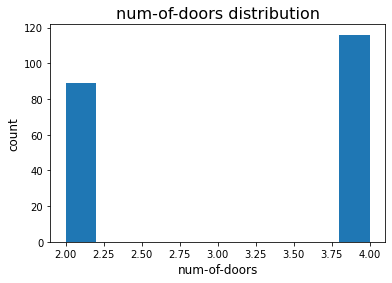

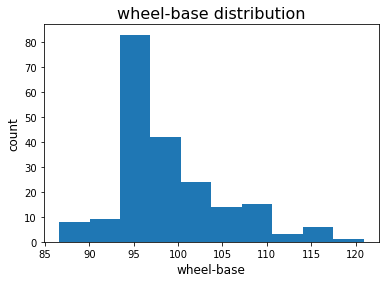

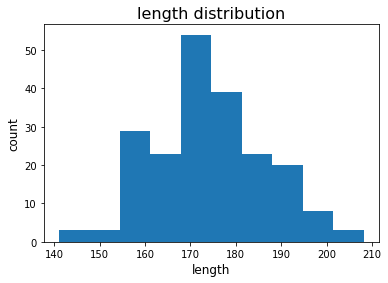

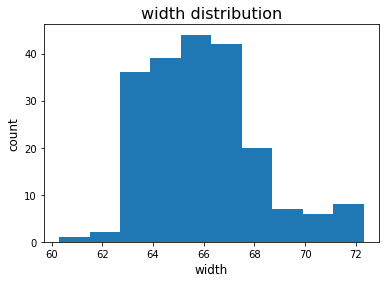

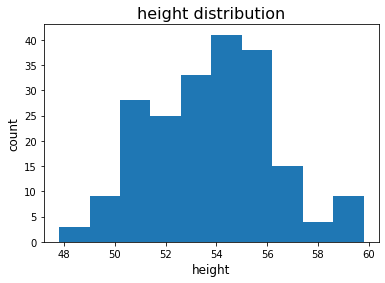

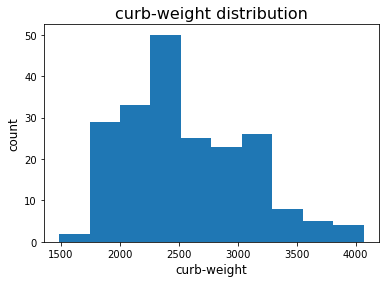

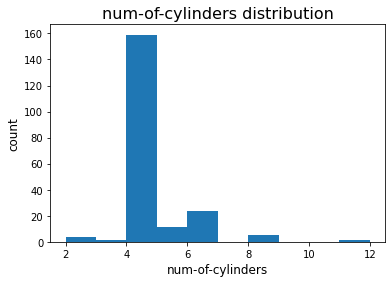

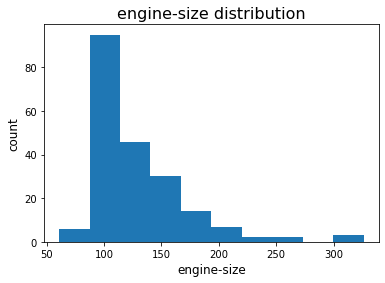

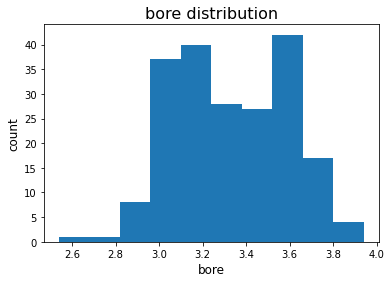

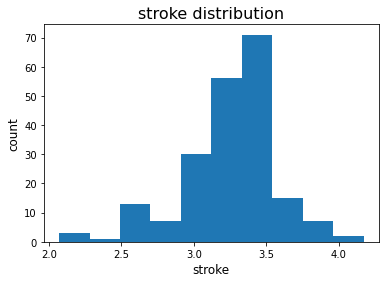

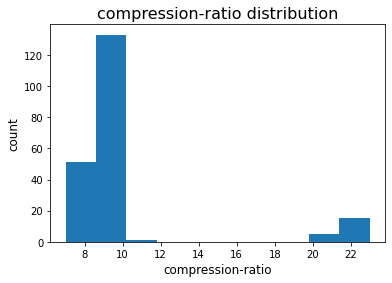

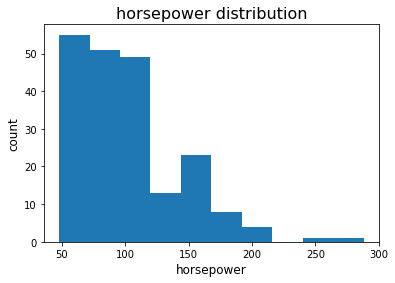

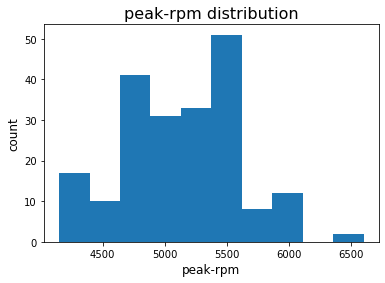

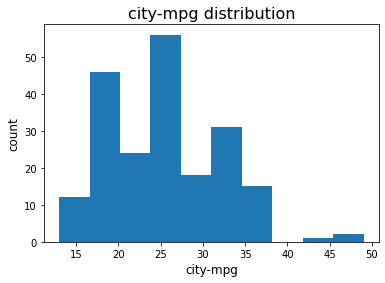

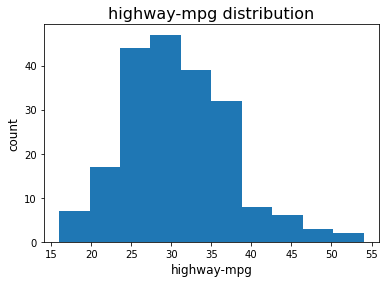

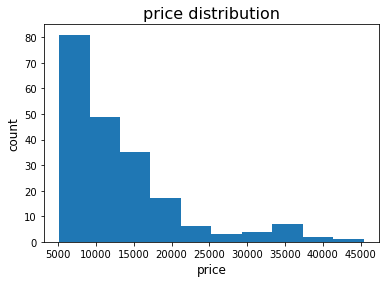

In [30]:
for i in car.columns[car.dtypes != "object"] :
    my_plot(i)

In [31]:
car[car["normalized-losses"]>200]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
106,1,231.0,nissan,gas,std,2,hatchback,rwd,front,99.2,...,181,mpfi,3.43,3.27,9.0,160.0,5200.0,19,25,18399.0
190,3,256.0,volkswagen,gas,std,2,hatchback,fwd,front,94.5,...,109,mpfi,3.19,3.40,8.5,90.0,5500.0,24,29,9980.0


In [32]:
car[car["make"] == "volkswagen"].sort_values("normalized-losses")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
184,2,94.0,volkswagen,diesel,std,4,sedan,fwd,front,97.3,...,97,idi,3.01,3.4,23.0,52.0,4800.0,37,46,7995.0
185,2,94.0,volkswagen,gas,std,4,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.4,9.0,85.0,5250.0,27,34,8195.0
186,2,94.0,volkswagen,gas,std,4,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.4,9.0,85.0,5250.0,27,34,8495.0
187,2,94.0,volkswagen,diesel,turbo,4,sedan,fwd,front,97.3,...,97,idi,3.01,3.4,23.0,68.0,4500.0,37,42,9495.0
188,2,94.0,volkswagen,gas,std,4,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.4,10.0,100.0,5500.0,26,32,9995.0
189,3,115.0,volkswagen,gas,std,2,convertible,fwd,front,94.5,...,109,mpfi,3.19,3.4,8.5,90.0,5500.0,24,29,11595.0
191,0,115.0,volkswagen,gas,std,4,sedan,fwd,front,100.4,...,136,mpfi,3.19,3.4,8.5,110.0,5500.0,19,24,13295.0
192,0,115.0,volkswagen,diesel,turbo,4,sedan,fwd,front,100.4,...,97,idi,3.01,3.4,23.0,68.0,4500.0,33,38,13845.0
193,0,115.0,volkswagen,gas,std,4,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.4,9.0,88.0,5500.0,25,31,12290.0
182,2,122.0,volkswagen,diesel,std,2,sedan,fwd,front,97.3,...,97,idi,3.01,3.4,23.0,52.0,4800.0,37,46,7775.0


In [33]:
car.corr()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.457484,-0.663595,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.113129,-0.105790,-0.132563,-0.004928,-0.178515,0.071064,0.273851,-0.035823,0.034606,-0.080149
normalized-losses,0.457484,1.000000,-0.348850,-0.073709,-0.006837,0.058378,-0.365674,0.064343,0.075319,0.072536,-0.050428,0.046739,-0.114772,0.166964,0.241134,-0.189530,-0.149357,0.095489
num-of-doors,-0.663595,-0.348850,1.000000,0.439635,0.385675,0.197735,0.540286,0.190720,-0.019503,0.013919,0.110133,-0.009353,0.171797,-0.127846,-0.240473,-0.014271,-0.037452,0.046497
wheel-base,-0.531954,-0.073709,0.439635,1.000000,0.874587,0.795144,0.589435,0.776386,0.339507,0.569329,0.489556,0.159684,0.249786,0.352876,-0.361338,-0.470414,-0.544082,0.584847
length,-0.357612,-0.006837,0.385675,0.874587,1.000000,0.841118,0.491029,0.877728,0.430672,0.683360,0.607016,0.128622,0.158414,0.553337,-0.286362,-0.670909,-0.704662,0.686567
width,-0.232919,0.058378,0.197735,0.795144,0.841118,1.000000,0.279210,0.867032,0.545007,0.735433,0.559262,0.182708,0.181129,0.641337,-0.219374,-0.642704,-0.677218,0.724558
height,-0.541038,-0.365674,0.540286,0.589435,0.491029,0.279210,1.000000,0.295572,-0.013995,0.067149,0.173506,-0.058994,0.261214,-0.109286,-0.321113,-0.048640,-0.107358,0.140439
curb-weight,-0.227691,0.064343,0.190720,0.776386,0.877728,0.867032,0.295572,1.000000,0.609727,0.850594,0.648848,0.168164,0.151362,0.750927,-0.266358,-0.757414,-0.797465,0.819817
num-of-cylinders,-0.113129,0.075319,-0.019503,0.339507,0.430672,0.545007,-0.013995,0.609727,1.000000,0.846031,0.234576,0.003389,-0.020002,0.691832,-0.124883,-0.445837,-0.466666,0.681036
engine-size,-0.105790,0.072536,0.013919,0.569329,0.683360,0.735433,0.067149,0.850594,0.846031,1.000000,0.585636,0.200246,0.028971,0.810216,-0.244383,-0.653658,-0.677470,0.860343


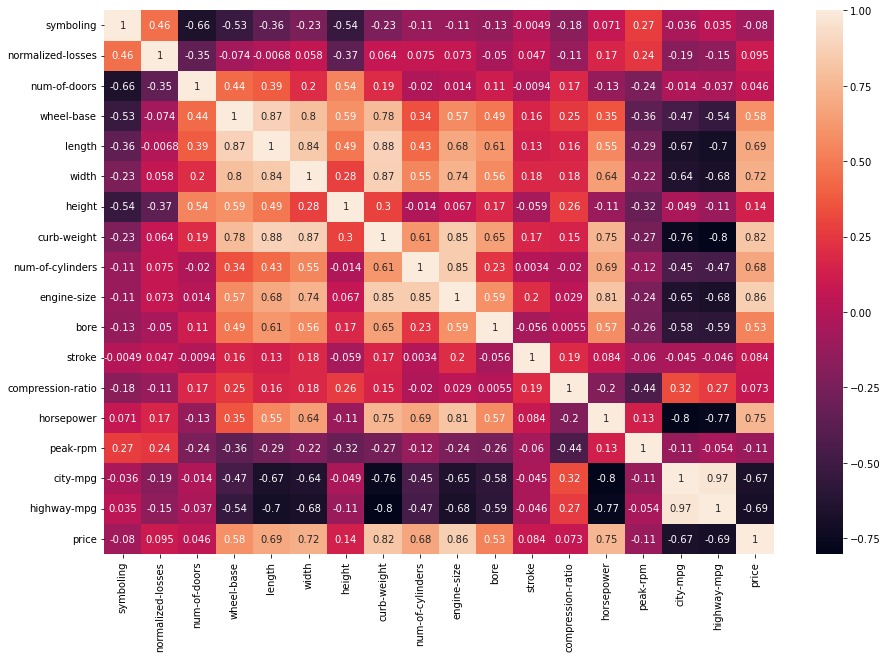

In [34]:
plt.figure(figsize=(15,10))
sns.heatmap(car.corr() , annot= True)
plt.show()

In [35]:
feature_corr = car.corr().unstack().sort_values()
feature_corr

horsepower         city-mpg            -0.802170
city-mpg           horsepower          -0.802170
highway-mpg        curb-weight         -0.797465
curb-weight        highway-mpg         -0.797465
horsepower         highway-mpg         -0.770780
                                          ...   
compression-ratio  compression-ratio    1.000000
horsepower         horsepower           1.000000
peak-rpm           peak-rpm             1.000000
num-of-cylinders   num-of-cylinders     1.000000
price              price                1.000000
Length: 324, dtype: float64

In [36]:
feature_corr[(abs(feature_corr)>=0.7) & (abs(feature_corr)<1)].drop_duplicates()

horsepower        city-mpg      -0.802170
highway-mpg       curb-weight   -0.797465
horsepower        highway-mpg   -0.770780
city-mpg          curb-weight   -0.757414
length            highway-mpg   -0.704662
price             width          0.724558
engine-size       width          0.735433
price             horsepower     0.749919
horsepower        curb-weight    0.750927
wheel-base        curb-weight    0.776386
                  width          0.795144
horsepower        engine-size    0.810216
curb-weight       price          0.819817
width             length         0.841118
num-of-cylinders  engine-size    0.846031
curb-weight       engine-size    0.850594
price             engine-size    0.860343
width             curb-weight    0.867032
length            wheel-base     0.874587
curb-weight       length         0.877728
highway-mpg       city-mpg       0.971337
dtype: float64

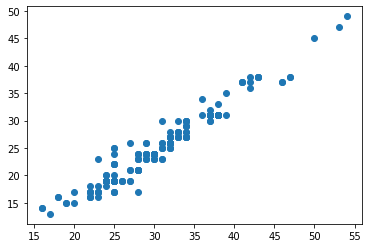

In [37]:
#scatter plot between heigh correlation
plt.figure()
plt.scatter(car["highway-mpg"],car["city-mpg"])
plt.show()

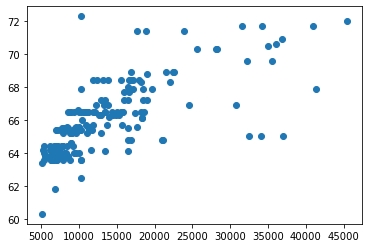

In [38]:
#low correlation plot
plt.figure()
plt.scatter(car["price"],car["width"])
plt.show()

<Figure size 432x288 with 0 Axes>

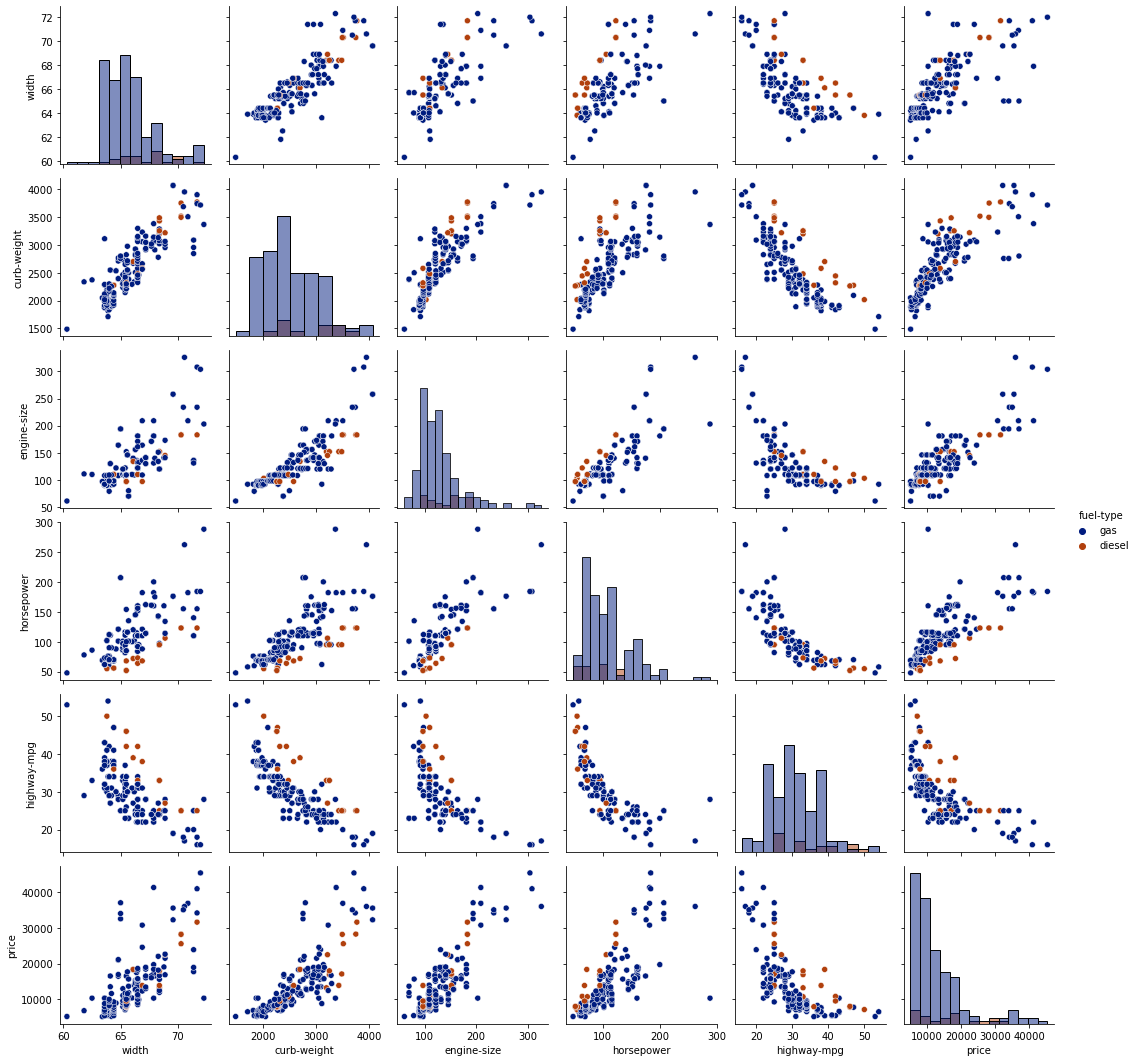

In [39]:
plt.figure()
sns.pairplot(car[["width", "curb-weight","engine-size","horsepower","highway-mpg","fuel-type","price"]],
             hue="fuel-type", palette='dark', diag_kind="hist")
plt.show()

In [40]:
car2 = car.drop(['width', 'length','wheel-base','engine-size','highway-mpg','horsepower','city-mpg'],axis = 1)

In [41]:
car2

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,height,curb-weight,engine-type,num-of-cylinders,fuel-system,bore,stroke,compression-ratio,peak-rpm,price
0,3,115.0,alfa-romero,gas,std,2,convertible,rwd,front,48.8,2548,dohc,4,mpfi,3.47,2.68,9.0,5000.0,13495.0
1,3,115.0,alfa-romero,gas,std,2,convertible,rwd,front,48.8,2548,dohc,4,mpfi,3.47,2.68,9.0,5000.0,16500.0
2,1,115.0,alfa-romero,gas,std,2,hatchback,rwd,front,52.4,2823,ohcv,6,mpfi,2.68,3.47,9.0,5000.0,16500.0
3,2,164.0,audi,gas,std,4,sedan,fwd,front,54.3,2337,ohc,4,mpfi,3.19,3.40,10.0,5500.0,13950.0
4,2,164.0,audi,gas,std,4,sedan,4wd,front,54.3,2824,ohc,5,mpfi,3.19,3.40,8.0,5500.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,4,sedan,rwd,front,55.5,2952,ohc,4,mpfi,3.78,3.15,9.5,5400.0,16845.0
201,-1,95.0,volvo,gas,turbo,4,sedan,rwd,front,55.5,3049,ohc,4,mpfi,3.78,3.15,8.7,5300.0,19045.0
202,-1,95.0,volvo,gas,std,4,sedan,rwd,front,55.5,3012,ohcv,6,mpfi,3.58,2.87,8.8,5500.0,21485.0
203,-1,95.0,volvo,diesel,turbo,4,sedan,rwd,front,55.5,3217,ohc,6,idi,3.01,3.40,23.0,4800.0,22470.0


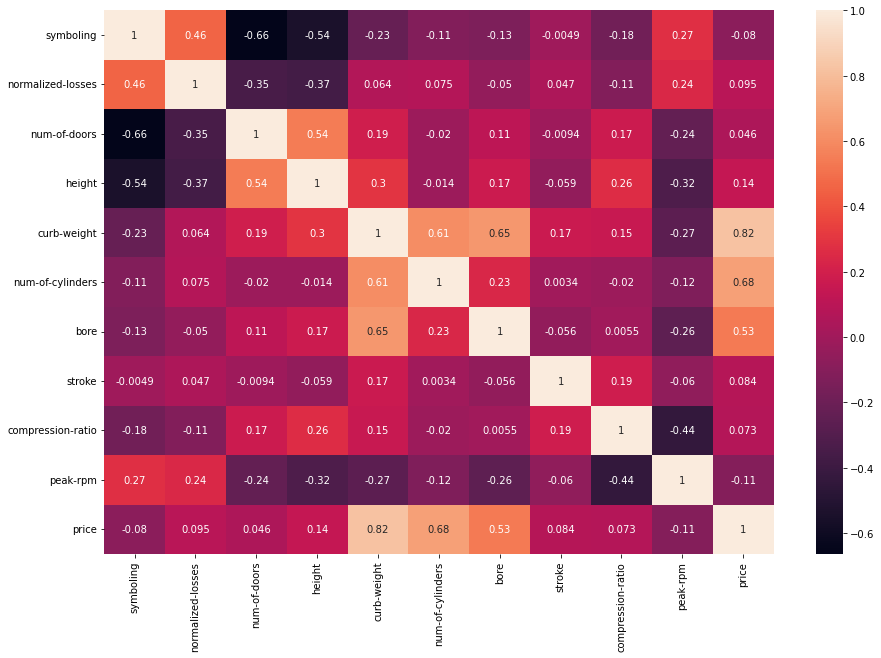

In [42]:
plt.figure(figsize=(15,10))
sns.heatmap(car2.corr() , annot= True)
plt.show()

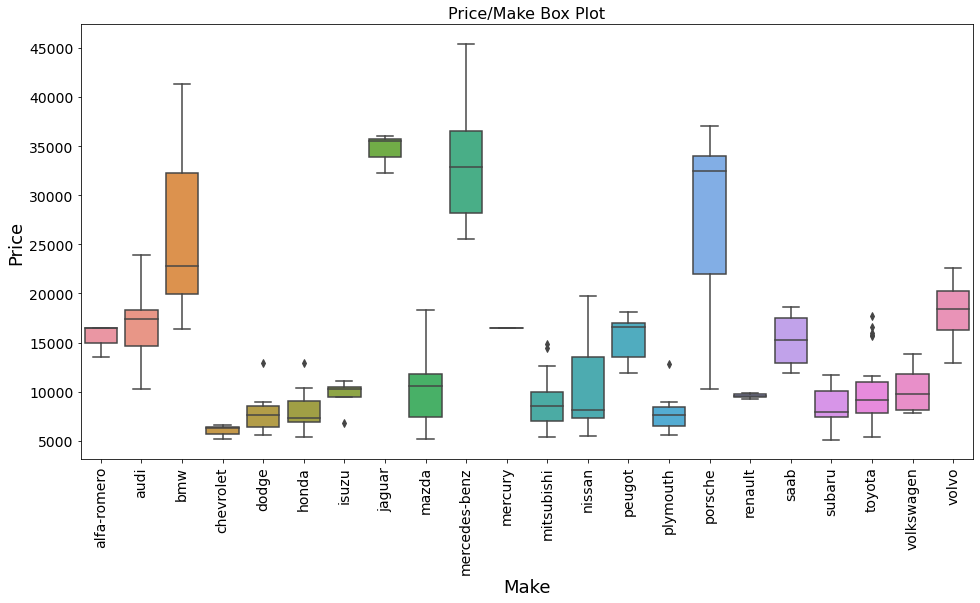

In [43]:
plt.figure(figsize=(16,8))
sns.boxplot(x=car2['make'], y=car2['price'])
plt.title('Price/Make Box Plot', size=16)
plt.xlabel('Make', size=18)
plt.ylabel('Price', size=18)
plt.xticks(rotation='vertical', size=14)
plt.yticks(rotation='horizontal', size=14)
plt.show()

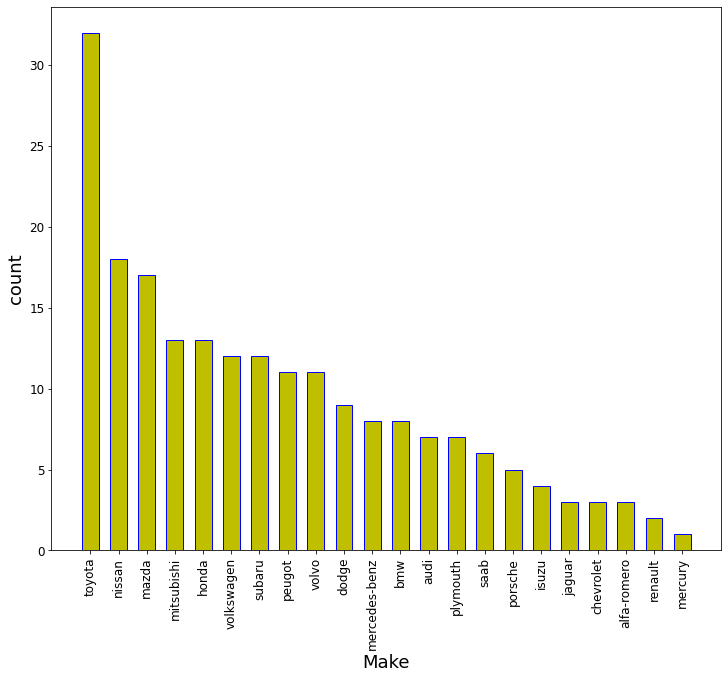

In [44]:
plt.figure(figsize=(12,10))
plt.bar(x= car['make'].value_counts().index, height= car['make'].value_counts(), 
        color = 'y', edgecolor = 'b', width = 0.6)
plt.xlabel('Make', size=18)
plt.ylabel('count', size=18)
plt.xticks(rotation='vertical', size=12)
plt.yticks(rotation='horizontal', size=12)
plt.show()

(array([81., 49., 35., 17.,  6.,  3.,  4.,  7.,  2.,  1.]),
 array([ 5118. ,  9146.2, 13174.4, 17202.6, 21230.8, 25259. , 29287.2,
        33315.4, 37343.6, 41371.8, 45400. ]),
 <BarContainer object of 10 artists>)

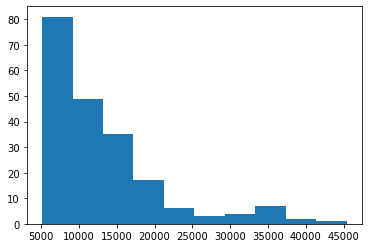

In [45]:
plt.hist(car['price'])

(array([15., 41., 35., 32., 21., 34.,  8.,  5.,  9.,  5.]),
 array([ 8.54051902,  8.75879385,  8.97706869,  9.19534353,  9.41361836,
         9.6318932 ,  9.85016804, 10.06844287, 10.28671771, 10.50499255,
        10.72326738]),
 <BarContainer object of 10 artists>)

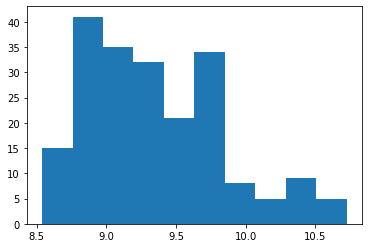

In [46]:
# apply log function 
plt.hist(np.log(car['price']))

## 6- data preparation


In [47]:
car2 = pd.get_dummies(car,drop_first=True)

In [48]:
car2

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,...,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,115.0,2,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,0,0,0,1,0,0
1,3,115.0,2,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,0,0,0,1,0,0
2,1,115.0,2,94.5,171.2,65.5,52.4,2823,6,152,...,0,1,0,0,0,0,0,1,0,0
3,2,164.0,4,99.8,176.6,66.2,54.3,2337,4,109,...,0,0,0,0,0,0,0,1,0,0
4,2,164.0,4,99.4,176.6,66.4,54.3,2824,5,136,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,4,109.1,188.8,68.9,55.5,2952,4,141,...,0,0,0,0,0,0,0,1,0,0
201,-1,95.0,4,109.1,188.8,68.8,55.5,3049,4,141,...,0,0,0,0,0,0,0,1,0,0
202,-1,95.0,4,109.1,188.8,68.9,55.5,3012,6,173,...,0,1,0,0,0,0,0,1,0,0
203,-1,95.0,4,109.1,188.8,68.9,55.5,3217,6,145,...,0,0,0,0,0,1,0,0,0,0


In [49]:
car2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 61 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   symboling             205 non-null    int64  
 1   normalized-losses     205 non-null    float64
 2   num-of-doors          205 non-null    int64  
 3   wheel-base            205 non-null    float64
 4   length                205 non-null    float64
 5   width                 205 non-null    float64
 6   height                205 non-null    float64
 7   curb-weight           205 non-null    int64  
 8   num-of-cylinders      205 non-null    int64  
 9   engine-size           205 non-null    int64  
 10  bore                  205 non-null    float64
 11  stroke                205 non-null    float64
 12  compression-ratio     205 non-null    float64
 13  horsepower            205 non-null    float64
 14  peak-rpm              205 non-null    float64
 15  city-mpg              2

In [ ]:
#Scaling
#Normalization: (X-X.min())/(X.max()-X.min())
#Standardization: (X-X.mean())/X.std()
#MAE = sum(abs(y_predict - y_actual))/n
#RMSE = sqrt(sum((y_predict - y_actual)**2)/n)

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler ,StandardScaler

### divid data into Train & Test



In [86]:
x = car2.drop('price',axis = 1)
y= pd.DataFrame(car2['price'])

In [87]:
X.head()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,...,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,115.0,2,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,0,0,0,1,0,0
1,3,115.0,2,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,0,0,0,1,0,0
2,1,115.0,2,94.5,171.2,65.5,52.4,2823,6,152,...,0,1,0,0,0,0,0,1,0,0
3,2,164.0,4,99.8,176.6,66.2,54.3,2337,4,109,...,0,0,0,0,0,0,0,1,0,0
4,2,164.0,4,99.4,176.6,66.4,54.3,2824,5,136,...,0,0,0,0,0,0,0,1,0,0


In [88]:
y.head()

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0


In [101]:
x_train ,x_test, y_train, y_test = train_test_split(x,y,test_size= 0.3,random_state=0)

In [90]:
x_train.shape

(143, 60)

In [91]:
y_train.shape

(143, 1)

In [93]:
x_test.shape, y_test.shape

((62, 60), (62, 1))

scaler and transform data

In [102]:
scaler_x = MinMaxScaler().fit(x_train)
scaler_y = MinMaxScaler().fit(y_train)

In [103]:
x_train_sc = scaler_x.transform(x_train)
x_test_sc = scaler_x.transform(x_test)

In [104]:
y_train_sc = scaler_y.transform(y_train)
y_test_sc = scaler_y.transform(y_test)

In [105]:
y_test_sc

array([[ 0.04473647],
       [ 0.29512093],
       [ 0.28114078],
       [-0.00123025],
       [ 0.13420942],
       [ 0.16787362],
       [ 0.0054243 ],
       [ 0.07557668],
       [ 0.3356354 ],
       [ 0.03729904],
       [ 0.44107368],
       [ 0.14259751],
       [ 0.1607717 ],
       [ 0.36764994],
       [ 0.14259751],
       [ 0.13404166],
       [ 0.11463722],
       [ 0.38375507],
       [ 0.0754928 ],
       [ 0.03615266],
       [ 0.13320285],
       [ 0.29036768],
       [ 0.13141339],
       [ 0.17765972],
       [ 0.30205508],
       [-0.00215294],
       [ 0.0487348 ],
       [ 0.32154341],
       [ 0.08843842],
       [ 0.00849993],
       [ 0.07772962],
       [ 0.1983783 ],
       [ 0.47037607],
       [ 0.10493499],
       [ 0.04624633],
       [ 1.00992591],
       [ 0.1789459 ],
       [ 0.36222564],
       [ 0.03304907],
       [ 1.12414372],
       [ 0.14259751],
       [ 0.34265343],
       [ 0.81054103],
       [ 0.27526912],
       [ 0.16955124],
       [ 0

In [72]:
y_train_sc

array([[0.15217715],
       [0.28263244],
       [0.13852341],
       [0.043121  ],
       [0.39352564],
       [0.05404399],
       [0.41954223],
       [0.12976019],
       [0.04518147],
       [0.32351919],
       [0.06169008],
       [0.02425401],
       [0.28739884],
       [0.10972643],
       [0.19430515],
       [0.18981183],
       [0.03850355],
       [0.07047813],
       [0.06183903],
       [0.33518693],
       [0.29112259],
       [0.32351919],
       [0.28255797],
       [0.02658756],
       [0.14721215],
       [0.06183903],
       [0.71769028],
       [0.04644754],
       [0.        ],
       [0.05404399],
       [0.29683233],
       [0.13596644],
       [0.03125465],
       [0.25798123],
       [0.21664763],
       [0.03502805],
       [0.29310858],
       [0.34337918],
       [0.07298545],
       [0.3125962 ],
       [0.08539794],
       [0.68045281],
       [0.2697731 ],
       [0.04984857],
       [0.3061417 ],
       [0.00697582],
       [0.18176853],
       [0.108

## 7- modeling (linear regression)

In [106]:
# inctance from linear model
lr_model = LinearRegression()
# fit model to data
lr_model.fit(x_train_sc, y_train_sc)
# predict output from test data
y_pred_sc = lr_model.predict(x_test_sc)


In [108]:
y_test_sc

array([[ 0.04473647],
       [ 0.29512093],
       [ 0.28114078],
       [-0.00123025],
       [ 0.13420942],
       [ 0.16787362],
       [ 0.0054243 ],
       [ 0.07557668],
       [ 0.3356354 ],
       [ 0.03729904],
       [ 0.44107368],
       [ 0.14259751],
       [ 0.1607717 ],
       [ 0.36764994],
       [ 0.14259751],
       [ 0.13404166],
       [ 0.11463722],
       [ 0.38375507],
       [ 0.0754928 ],
       [ 0.03615266],
       [ 0.13320285],
       [ 0.29036768],
       [ 0.13141339],
       [ 0.17765972],
       [ 0.30205508],
       [-0.00215294],
       [ 0.0487348 ],
       [ 0.32154341],
       [ 0.08843842],
       [ 0.00849993],
       [ 0.07772962],
       [ 0.1983783 ],
       [ 0.47037607],
       [ 0.10493499],
       [ 0.04624633],
       [ 1.00992591],
       [ 0.1789459 ],
       [ 0.36222564],
       [ 0.03304907],
       [ 1.12414372],
       [ 0.14259751],
       [ 0.34265343],
       [ 0.81054103],
       [ 0.27526912],
       [ 0.16955124],
       [ 0

In [109]:
y_pred_sc

array([[ 0.03278811],
       [ 0.29634905],
       [ 0.19433842],
       [-0.19710799],
       [ 0.1537358 ],
       [ 0.17190008],
       [ 0.02651939],
       [-0.00365446],
       [ 0.31294324],
       [ 0.07671458],
       [ 0.43161173],
       [ 0.66734845],
       [ 0.2108129 ],
       [ 0.22278599],
       [ 0.0676362 ],
       [ 0.16949571],
       [ 0.17637124],
       [ 0.32951813],
       [ 0.07882168],
       [ 0.09156299],
       [ 0.13426776],
       [ 0.28049767],
       [ 0.18764316],
       [ 0.18823028],
       [ 0.37065199],
       [ 0.06237265],
       [ 0.06825549],
       [ 0.28735922],
       [ 0.06958543],
       [ 0.0189869 ],
       [ 0.09575161],
       [ 0.14597384],
       [ 0.50205745],
       [ 0.11186837],
       [ 0.06833007],
       [ 0.64583836],
       [ 0.24392252],
       [ 0.2630108 ],
       [-0.00623004],
       [ 0.85540317],
       [ 0.03467664],
       [ 0.22560015],
       [ 0.77476418],
       [ 0.40630601],
       [ 0.14137997],
       [ 0

In [110]:
#MAE = sum(abs(y_predict - y_actual))/n avg error plus or minus
#RMSE = sqrt(sum((y_predict - y_actual)**2)/n) avg error plus or minus

mae = mean_absolute_error(y_test_sc,y_pred_sc)
rmse = np.sqrt(mean_squared_error(y_test_sc,y_pred_sc))

In [114]:
print('MAE =' , mae.round(4))
print('RMSE =' , rmse.round(4))

MAE = 0.062
RMSE = 0.1056


In [116]:
y_test_inv = scaler_y.inverse_transform(y_test_sc)
y_pred_inv= scaler_y.inverse_transform(y_pred_sc)

acutal_mae = mean_absolute_error(y_test_inv,y_pred_inv)
actual_rmse = np.sqrt(mean_squared_error(y_test_inv,y_pred_inv))

print('MAE =' , acutal_mae.round(4))
print('RMSE =' , actual_rmse.round(4))

MAE = 2219.1704
RMSE = 3778.1954


In [117]:
y_test_inv 

array([[ 6795.],
       [15750.],
       [15250.],
       [ 5151.],
       [ 9995.],
       [11199.],
       [ 5389.],
       [ 7898.],
       [17199.],
       [ 6529.],
       [20970.],
       [10295.],
       [10945.],
       [18344.],
       [10295.],
       [ 9989.],
       [ 9295.],
       [18920.],
       [ 7895.],
       [ 6488.],
       [ 9959.],
       [15580.],
       [ 9895.],
       [11549.],
       [15998.],
       [ 5118.],
       [ 6938.],
       [16695.],
       [ 8358.],
       [ 5499.],
       [ 7975.],
       [12290.],
       [22018.],
       [ 8948.],
       [ 6849.],
       [41315.],
       [11595.],
       [18150.],
       [ 6377.],
       [45400.],
       [10295.],
       [17450.],
       [34184.],
       [15040.],
       [11259.],
       [ 7609.],
       [ 7609.],
       [14869.],
       [11694.],
       [ 8495.],
       [23875.],
       [ 7099.],
       [ 8058.],
       [10595.],
       [16503.],
       [18399.],
       [10795.],
       [18420.],
       [ 9960.

In [118]:
y_pred_inv


array([[ 6367.666818  ],
       [15793.92375959],
       [12145.51375391],
       [-1854.56718873],
       [10693.36091149],
       [11343.0063601 ],
       [ 6143.46587696],
       [ 5064.29817825],
       [16387.41501168],
       [ 7938.6968519 ],
       [20631.59341264],
       [29062.7172766 ],
       [12734.72328345],
       [13162.94099962],
       [ 7614.00863552],
       [11257.01392206],
       [11502.91751988],
       [16980.21601668],
       [ 8014.05728137],
       [ 8469.75028459],
       [ 9997.08659763],
       [15226.999055  ],
       [11906.05746261],
       [11927.05584131],
       [18451.36837227],
       [ 7425.75779714],
       [ 7636.15754972],
       [15472.40240156],
       [ 7683.72289884],
       [ 5874.06640646],
       [ 8619.55626485],
       [10415.75431725],
       [23151.08459028],
       [ 9195.97222616],
       [ 7638.8250032 ],
       [28293.40905768],
       [13918.8887869 ],
       [14601.5812906 ],
       [ 4972.18259417],
       [35788.49421556],
